In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
import pickle
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [2]:
# read file

def read_file(path):
    with open(path, "r") as f:
        return f.read()

# load data

def load_data():
    data_path = "./data/data.txt"
    all_data = read_file(data_path)

    all_lines = all_data.split('\n')

    # extract features and labels from eah line

    features = []
    labels = []
    for line in all_lines:
        if line[0:4] == 'spam':
            labels.append(1)
            features.append(line[5:])
            pass
        elif line[0:3] == 'ham':
            labels.append(0)
            features.append(line[4:])
            pass
        else:
            pass

    return features, labels

In [3]:
features, labels = load_data()
print("Total no:of Mails : {}".format(len(labels)))
print("Total no:of Spam : {}".format(labels.count(1)))
print("Total no:of Ham : {}".format(labels.count(0)))

Total no:of Mails : 5574
Total no:of Spam : 747
Total no:of Ham : 4827


In [4]:
features, labels = load_data()
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# transform text into frequency

vectorizer = TfidfVectorizer(input='content', lowercase=True, stop_words='english')
features_train_transformed = vectorizer.fit_transform(features_train)
features_test_transformed = vectorizer.transform(features_test)

In [5]:
# machine algo

prediction = dict()
classifier = DecisionTreeClassifier(min_samples_split=7, random_state=111)
classifier.fit(features_train_transformed, labels_train)
prediction['DecisionTreeClassifier'] = classifier.predict(features_test_transformed)
print("Classifier accuray {:.2f}%".format(classifier.score(features_test_transformed, labels_test)*100))

Classifier accuray 97.13%


In [6]:
# Classifier performance evaluation

print("Classification Report : \n", classification_report(labels_test, prediction['DecisionTreeClassifier'], target_names = ["Ham", "Spam"]))
conf_mat = confusion_matrix(labels_test, prediction['DecisionTreeClassifier'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Classification Report : 
              precision    recall  f1-score   support

        Ham       0.98      0.99      0.98      1447
       Spam       0.93      0.85      0.89       226

avg / total       0.97      0.97      0.97      1673



In [7]:
conf_mat

array([[1432,   15],
       [  33,  193]], dtype=int64)

In [8]:
conf_mat_normalized

array([[ 0.98963372,  0.01036628],
       [ 0.1460177 ,  0.8539823 ]])

Heat Map for Decision Tree


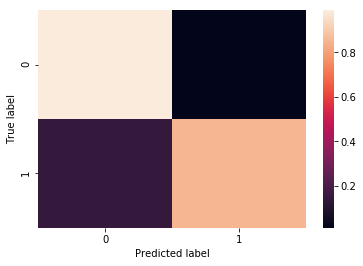

In [9]:
print("Heat Map for Decision Tree")
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
# use train model for prediction

def save(vectorizer, classifier):
    pkl_filename = "dt.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump((vectorizer, classifier), file) 

In [11]:
save(vectorizer, classifier)